# <b> <font color=blue>TASK 1: TRAINING</font></b>

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

<b><font color=purple>Load the dataset</font></b>

In [8]:
data_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2
    
)

data_path = r'C:\Users\oleev\Desktop\dwt\EuroSAT\2750'

data = data_generator.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    classes=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake'] 

)


Found 27000 images belonging to 10 classes.


<b><font color=purple>Train-Test Split</font></b>

In [9]:
train_data = data_generator.flow_from_directory(
    data_path,
    target_size=(64, 64),
    batch_size=8,
    class_mode='categorical',
    subset='training',
    classes=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

    

)


Found 21600 images belonging to 10 classes.


In [10]:
test_data = data_generator.flow_from_directory(
    r'C:\Users\oleev\Desktop\dwt\EuroSAT\2750',
    target_size=(64, 64),
    batch_size=1,
    subset='validation',
    class_mode='categorical',
    classes=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


    
)


Found 5400 images belonging to 10 classes.


<b><font color=purple>Model building using ANN</font></b>


In [27]:
ann = keras.Sequential([
        keras.layers.Flatten(input_shape=(64,64,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(train_data,validation_data=test_data, epochs=5)

Epoch 1/5
2700/2700 [==============================] - 411s 152ms/step - loss: 1.7367 - accuracy: 0.3415 - val_loss: 1.5781 - val_accuracy: 0.3778
Epoch 2/5
2700/2700 [==============================] - 403s 149ms/step - loss: 1.5279 - accuracy: 0.4341 - val_loss: 1.3760 - val_accuracy: 0.5069
Epoch 3/5
2700/2700 [==============================] - 403s 149ms/step - loss: 1.4420 - accuracy: 0.4688 - val_loss: 1.3159 - val_accuracy: 0.5259
Epoch 4/5
2700/2700 [==============================] - 404s 149ms/step - loss: 1.3784 - accuracy: 0.4945 - val_loss: 1.4456 - val_accuracy: 0.4750
Epoch 5/5
2700/2700 [==============================] - 406s 150ms/step - loss: 1.3352 - accuracy: 0.5171 - val_loss: 1.2729 - val_accuracy: 0.5452


In [28]:
ann.evaluate(test_data)


5400/5400 [==============================] - 100s 19ms/step - loss: 1.2758 - accuracy: 0.5476


[1.2757649421691895, 0.5475925803184509]

<b><font color=purple>Confusion Matrix</font></b>


In [29]:
from sklearn.metrics import confusion_matrix,classification_report

y_true = []
for i in range(test_data.samples // test_data.batch_size):
    _, batch_labels = test_data.next()
    y_true.extend(np.argmax(batch_labels, axis=-1))
    
# Generating predictions for test data
y_probab = ann.predict(test_data, steps=np.ceil(test_data.samples/test_data.batch_size))

#Generating predicted classes for test data
y_pred = np.argmax(y_probab, axis=-1)

#Generating confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Classification Report: \n", classification_report(y_true, y_pred))

5400/5400 [==============================] - 96s 18ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.44      0.55       600
           1       0.85      0.72      0.78       600
           2       0.46      0.13      0.20       600
           3       0.39      0.14      0.21       500
           4       0.55      0.85      0.67       500
           5       0.47      0.70      0.57       400
           6       0.44      0.52      0.48       500
           7       0.40      0.82      0.54       600
           8       0.51      0.55      0.53       500
           9       0.83      0.64      0.72       600

    accuracy                           0.55      5400
   macro avg       0.56      0.55      0.52      5400
weighted avg       0.57      0.55      0.53      5400



<b><font color=purple>Plotting Confusion Matrix</font></b>


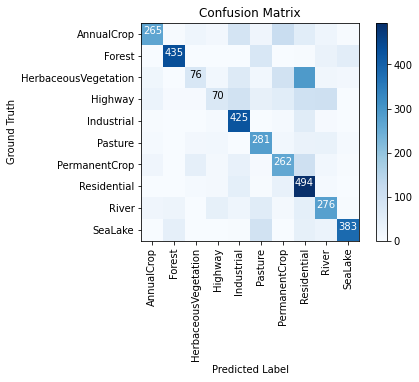

In [30]:
#plotting confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(data.class_indices))
plt.xticks(tick_marks, data.class_indices, rotation=90)
plt.yticks(tick_marks, data.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('Ground Truth')

# adding values in each cell
thresh = cm.max() / 2.
for i, j in zip(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

<b><font color=black> RESULTS:At the end of 5 epochs,the acuracy is 54.7% ,for better results i am training the dataset using CNN </font></b>


<b><font color=purple>Model building using CNN</font></b>


In [11]:
CNN = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10,activation='softmax')
        
])

In [12]:
CNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
CNN.fit(train_data, validation_data=test_data, epochs=10)

Epoch 1/10
2700/2700 [==============================] - 201s 72ms/step - loss: 1.2858 - accuracy: 0.5091 - val_loss: 0.9439 - val_accuracy: 0.6522
Epoch 2/10
2700/2700 [==============================] - 128s 47ms/step - loss: 0.7986 - accuracy: 0.7118 - val_loss: 0.8224 - val_accuracy: 0.7072
Epoch 3/10
2700/2700 [==============================] - 129s 48ms/step - loss: 0.6511 - accuracy: 0.7638 - val_loss: 0.6322 - val_accuracy: 0.7770
Epoch 4/10
2700/2700 [==============================] - 112s 41ms/step - loss: 0.5725 - accuracy: 0.7926 - val_loss: 0.5839 - val_accuracy: 0.7893
Epoch 5/10
2700/2700 [==============================] - 106s 39ms/step - loss: 0.5132 - accuracy: 0.8178 - val_loss: 0.4860 - val_accuracy: 0.8265
Epoch 6/10
2700/2700 [==============================] - 107s 39ms/step - loss: 0.4629 - accuracy: 0.8338 - val_loss: 0.6525 - val_accuracy: 0.7665
Epoch 7/10
2700/2700 [==============================] - 106s 39ms/step - loss: 0.4252 - accuracy: 0.8473 - val_loss: 0

In [14]:
CNN.evaluate(test_data)
 

5400/5400 [==============================] - 27s 5ms/step - loss: 0.4485 - accuracy: 0.8544


[0.44851791858673096, 0.8544444441795349]

<b><font color=purple>Confusion Matrix</font></b>


In [37]:
y_true = []
for i in range(test_data.samples // test_data.batch_size):
    _, batch_labels = test_data.next()
    y_true.extend(np.argmax(batch_labels, axis=-1))

# Generating predictions for test data
y_probab = CNN.predict(test_data, steps=np.ceil(test_data.samples/test_data.batch_size))

#Generating predicted classes for test data
y_pred = np.argmax(y_probab, axis=-1)

#Generating confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Classification Report: \n", classification_report(y_true, y_pred))

5400/5400 [==============================] - 27s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       600
           1       0.95      0.95      0.95       600
           2       0.84      0.80      0.82       600
           3       0.75      0.72      0.74       500
           4       0.88      0.93      0.91       500
           5       0.76      0.90      0.82       400
           6       0.74      0.66      0.70       500
           7       0.89      0.98      0.93       600
           8       0.81      0.79      0.80       500
           9       0.99      0.94      0.96       600

    accuracy                           0.86      5400
   macro avg       0.85      0.85      0.85      5400
weighted avg       0.86      0.86      0.85      5400



<b><font color=purple>Plotting Confusion Matrix</font></b>


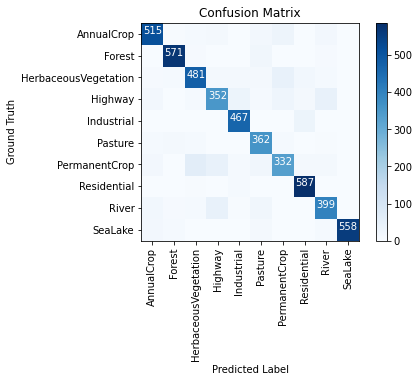

In [16]:
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(data.class_indices))
plt.xticks(tick_marks, data.class_indices, rotation=90)
plt.yticks(tick_marks, data.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('Ground Truth')

#adding values in each cell
thresh = cm.max() / 2.
for i, j in zip(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

<b><font color=black>RESULTS:With CNN, at the end 10 epochs, accuracy was at around 85.4% which is a significant improvement over ANN. CNN's are best for image classification and gives better accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features.</font></b>


# <b> <font color=blue>TASK 2: CLASSIFICATION RESULTS OF 20 SAMPLE IMAGES</font></b>

In [23]:
import os


# Select 20 sample images from the test data
sample_data = []
for i in range(20):
    sample_data.append(test_data[i][0][0])

# Generating predictions for sample images
y_prob = CNN.predict(np.array(sample_data))

# Getting predicted classes for the sample images
y_pred = np.argmax(y_prob, axis=-1)

# Getting all class labels
class_labels = train_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}

# Create output directory for saving results
output_dir = 'sample_results'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

# Save classification results for each sample image
for i in range(len(y_pred)):
    filename = 'sample_{}.jpg'.format(i+1)
    label = class_labels[y_pred[i]]
    result = 'Predicted class: {}'.format(label)
    with open(os.path.join(output_dir, 'sample_{}.txt'.format(i+1)), 'w') as f:
        f.write(result)
    keras.preprocessing.image.save_img(os.path.join(output_dir, filename), sample_data[i])


1/1 [==============================] - 0s 28ms/step


<b><font color=black>Randomly selected 20 images,perform the classification and saved in a folder named 'sample_results'</font></b>


# <b> <font color=blue>INFERENCES<font></b>

<b><font color=black>CNN outperformed ANN:Because CNN can capture spatial features in the data, CNNs are made to work well with image data. On the other hand, data with less spatial correlation are better suited for ANNs.</font></b>
    
<b><font color=black>The Softmax activation function outperformed ReLU: In the output layer of a classification network, softmax activation is frequently used to guarantee that the outputs are normalized probabilities. In the hidden layers of a neural network, ReLU is a common activation function. However, it can occasionally cause the vanishing gradient problem, which results in slower training and lower accuracy.</font></b>
    
<b><font color=black>TMax pooling and convolutional layers improved accuracy: Max pooling reduces the spatial dimensions of the data, making it easier to manage for subsequent layers, and convolutional layers contribute to the process of extracting features from the input data. When compared to the ANN, the CNN performs better because of the combination of these layers.</font></b>
